<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#4DC3FF;
           background-color:#373737;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="text-align: center;
               padding: 15px;
               color:#4DC3FF;">Kaggle 2021 Survey answer Beginners' Questions</h1>
</div>

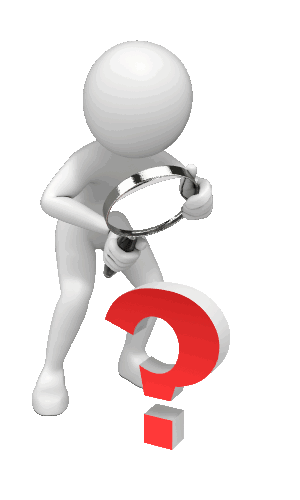

In [ ]:
# Data Analysis
import numpy as np
import pandas as pd
import random

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stop warnings
import warnings
warnings.filterwarnings('ignore')


**Student**: <span style="color:slategray">First of All I want to be a Data Scientist, but I'm a girl and I've seen from the poll that this industry</span>**<span style="color:red"> is more biased for men.</span>**

I've an evidence look! 

In [ ]:
# Data
survey = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")

counts = survey['Q2'].value_counts()[:-1]
counts = counts[:2]
labels = counts.index

# Numbers
numbers = counts.values

# size of the chart
plt.subplots(figsize=(7, 7))

# Explodes
explodes_list = [0.05, 0.1]

# colors
colors = ['#ffc20e', '#00FFFF']

# Pie Chart
plt.pie(numbers, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explodes_list)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('{} Details'.format('Gender'))

# Displaing Chart
plt.show()

No no that's not real. We call that <a href='https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson%27s%20paradox%2C%20which%20also%20goes%20by%20several%20other,disappears%20or%20reverses%20when%20the%20groups%20are%20combined.'>Simpson's paradox</a>

I'll prove that your **<mark style="
                                    background-color: yellow;
                                    color: red;">claim is not real</mark>** by a simple evidence, Let's see the salaries of men and women for example

In [ ]:
df = survey[survey['Q2'].isin(pd.Series(['Man', 'Woman']))].groupby(['Q25', 'Q2']).size().reset_index()

df['count'] = df[0]
df.drop(0, axis=1, inplace=True)
df_woman = pd.DataFrame(df[df['Q2'] == 'Woman'])
df_man = pd.DataFrame(df[df['Q2'] == 'Man'])

df_woman['rate'] = df_woman['count'] / df_woman['count'].sum()
df_man['rate'] = df_man['count'] / df_man['count'].sum()

df = pd.concat([df_man, df_woman], axis=0)
df_woman[df_woman['Q2'] == 'Woman']['rate'].count()

order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999',
         '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999',
         '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999',
         '250,000-299,999', '300,000-499,999', '$500,000-999,999', '>$1,000,000']

sns.set_style('darkgrid')
plt.subplots(figsize=(10, 18))
sns.barplot(data=df, y='Q25', x='rate', hue='Q2', linewidth=0.3, palette=['#2B00FF', '#D4FF00'], order=order)
plt.legend(loc=1)
plt.xlim([0, .4])
plt.title('Salary Men Vs Women')
plt.show()

<span style="color:black">So did you see that it seems that they are equal and</span>**<span style="color:green"> there is no bias.</span>**

**Student**: Ok, you won me I'll start learning **Data Science**, so <mark>what programmin language do you recommend or what language is being used more <span style="color:red">Python or R</span>?</mark>

Ok, that's a smart question I'll show you some graphs refer to an answer for your questions.

> # **Python Vs R**

In [ ]:
python_count = survey[1:]['Q7_Part_1'].count() / (survey.shape[0]-1)
R_count = survey[1:]['Q7_Part_2'].count() / (survey.shape[0]-1)
both_count = survey.loc[1:, ['Q7_Part_1', 'Q7_Part_2']][ (survey['Q7_Part_1'] == "Python") & (survey["Q7_Part_2"] == 'R') ].count()[0] / (survey.shape[0]-1)
sns.barplot(['Python', 'R', 'Both'], [python_count*100 , R_count*100, both_count*100], palette=['#82ACBA', '#BA82AC', '#82BA90'])
plt.title('Python Vs R Comparison')
plt.xlabel('Language Used')
plt.ylabel('Percentage')
plt.show()

Now let's see Python and R the used percentage and recommended percentage

In [ ]:
python_recommend = survey.query("Q8 == 'Python'")['Q8'].count() /  (survey.shape[0]-1)
R_recommed = survey.query("Q8 == 'R'")['Q8'].count() / (survey.shape[0]-1)
sns.barplot(['Python', 'R'], [python_recommend*100, R_recommed*100], palette='plasma')
plt.title('Python Vs R Comparison')
plt.xlabel('Language Recommendation')
plt.ylabel('Percentage')
plt.show()

So from both graphs we know that <h3><span style="color:#4DC3FF">Python has more recommendations than R in Data Science.</span></h3>

Student: Ooh I forgot to say that I want to be specially, **Data Analyst**. I'm I late :)

yes, you're late, but also I'll show you and I think <mark>it will be the same graph.</mark>

In [ ]:
df_data_analyst = survey.query("Q5 == 'Data Analyst'")
python_recommend = df_data_analyst.query("Q8 == 'Python'")['Q8'].count() /  (df_data_analyst.shape[0]-1)
R_recommed = df_data_analyst.query("Q8 == 'R'")['Q8'].count() / (df_data_analyst.shape[0]-1)
sns.barplot(['Python', 'R'], [python_recommend*100, R_recommed*100], palette=['#9082BA', '#ACBA82'])
plt.title('Python Vs R Comparison according to Data Analysts')
plt.xlabel('Language Recommendation')
plt.ylabel('Percentage')
plt.show()

Yes, it is the same.

<h3><span style="color:#4DC3FF">Python also is better for Data Analysis field</span></h3>

**Student:** 
> # **what do I need to be a data analyst?**

I'll show you what <mark>do you need to help you become a data analyst:</mark>

- hardware used (it's a very common question)
- Education
- Programming Language (finished)
- BI tools
- ML Algorithms

# Hardware

In [ ]:
sns.countplot(y=df_data_analyst['Q11'] , palette='plasma')
plt.title('Hardware Data Analysts Use')
plt.show()

So you must be happy it's not necessary to have a strange hardware <mark>you can use your computer or Laptop</mark>

# **Education**

In [ ]:
order = ['I prefer not to answer', 'No formal education past high school',
                "Some college/university study without earning a bachelor’s degree",
                "Bachelor’s degree", "Master’s degree", "Doctoral degree",
                'Professional doctorate']

sns.countplot(y=df_data_analyst['Q4'] , palette='Blues', order=order)
plt.title('Education Data Analysts have')
plt.show()

I've a nice news here:
<h3><span style="color:#4DC3FF">You Don't need to have a very strong degree to work as data analyst, just be enrolled in your college</span></h3>

# BI tools

In [ ]:
sns.countplot(y=df_data_analyst['Q35'] , palette='Greens_r')
plt.title('BI tool Data Analysts most use')
plt.show()

Umm, It seems that:
<h3><span style="color:#4DC3FF">Data Analysts use in regular basis use either MS BI or Tableau</span></h3>


# ML knoledge

In [ ]:
order = ['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years',
         '5-10 years', '10-20 years', '20 or more years']

sns.countplot(y=df_data_analyst['Q15'] , palette='Oranges_r', order=order)
plt.title('BI tool Data Analysts most use')
plt.show()

That's a new good news:
<h3><span style="color:#4DC3FF">Data Analysts Don't have a huge knoledge in ML in regular basis</span></h3>